In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()

### Initialize your cluster centers

array([1, 3])

In [14]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    
    idx = np.random.choice(range(data.shape[0]), k, replace=False)
    return np.copy(data[idx, :])

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [67]:
from scipy.spatial.distance import cdist
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    
    return cdist(data, mu)

#### Update k-means parameters

In [68]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    
    num_samples = data.shape[0]
    
    dist_matrix = build_distance_matrix(data, mu_old)
    z = np.argmin(dist_matrix, axis=1).reshape(num_samples, 1)
    losses = np.min(dist_matrix, axis=1).reshape(num_samples, 1)
    
    mu = np.array([np.mean(data[z[:, 0] == i, :], axis = 0) for i in range(k)])
    
    return losses, z, mu

#### Play with k-means

In [92]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold, do_plot = True):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []
    
    assignments, mu = None, None

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        if do_plot:
            plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu
        
    return assignments, mu

In [69]:
# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
_ = kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [70]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [71]:
original_image[10,20,:]

array([155, 174,  91], dtype=uint8)

In [72]:
original_image.reshape(480 * 480, 3)[10 * 480 + 20,:]

array([155, 174,  91], dtype=uint8)

In [84]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = original_image.reshape(original_image.shape[0] * original_image.shape[1], original_image.shape[2])
    #processed_image = processed_image / 255.
    return processed_image

processed_image = preprocess_image(original_image)

The current iteration of k-means is: 0,                the average loss is 58.51190109662857.
The current iteration of k-means is: 1,                the average loss is 46.650709556285804.
The current iteration of k-means is: 2,                the average loss is 41.57269056558746.
The current iteration of k-means is: 3,                the average loss is 38.9293680226486.
The current iteration of k-means is: 4,                the average loss is 37.98329204929312.
The current iteration of k-means is: 5,                the average loss is 37.55325236820044.
The current iteration of k-means is: 6,                the average loss is 37.30774419633864.
The current iteration of k-means is: 7,                the average loss is 37.14920405084683.
The current iteration of k-means is: 8,                the average loss is 37.040462839883546.
The current iteration of k-means is: 9,                the average loss is 36.96852217938084.


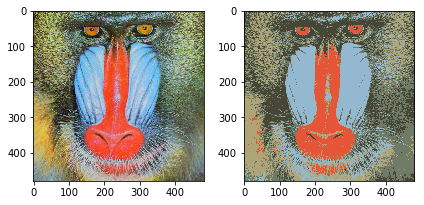

In [93]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    
    processed_image = preprocess_image(original_image)
    assignments, mu = kmeans(processed_image, k, max_iters, threshold, do_plot = False)
    
    # plot histgram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 10
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)

In [81]:
assignments.shape

(230400, 1)